<a href="https://colab.research.google.com/github/PaletteofDesign/regression_metrics/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignments: Linear Regression Exercise (Practice) and Regression Metrics (Practice)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
f = '/content/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(f)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [4]:
df.isna().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

CRIM       float64
NOX        float64
RM         float64
AGE        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


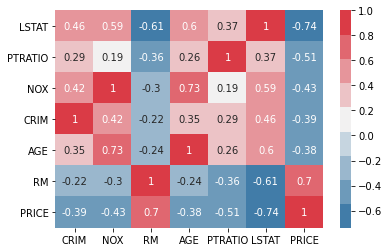

In [8]:
sn.heatmap(df.corr().sort_values(by=['PRICE']), cmap=sn.diverging_palette(240,10,n=9), annot=True)

In [9]:
n_df = df.loc[:,['PTRATIO', 'LSTAT', 'RM', 'PRICE']]
n_df

,PTRATIO,LSTAT,RM,PRICE
0,15.3,4.98,6.575,24.0
1,17.8,9.14,6.421,21.6
2,17.8,4.03,7.185,34.7
3,18.7,2.94,6.998,33.4
4,18.7,5.33,7.147,36.2
...,...,...,...,...
501,21.0,9.67,6.593,22.4
502,21.0,9.08,6.120,20.6
503,21.0,5.64,6.976,23.9
504,21.0,6.48,6.794,22.0


In [10]:
df.shape

(506, 7)

In [11]:
n_df.shape

(506, 4)

In [12]:
n_df.isna().sum()

PTRATIO    0
LSTAT      0
RM         0
PRICE      0
dtype: int64

In [13]:
y = n_df.loc[:, 'PRICE']

In [14]:
X = n_df.drop(columns='PRICE')

In [15]:
X

,PTRATIO,LSTAT,RM
0,15.3,4.98,6.575
1,17.8,9.14,6.421
2,17.8,4.03,7.185
3,18.7,2.94,6.998
4,18.7,5.33,7.147
...,...,...,...
501,21.0,9.67,6.593
502,21.0,9.08,6.120
503,21.0,5.64,6.976
504,21.0,6.48,6.794


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [20]:
r2_score(y_train, train_preds)

0.6877966145058925

In [21]:
r2_score(y_test, test_preds)

0.6331590458194676

There is a slight difference between training and test data using r^2.

In [22]:
train_preds = reg.predict(X_train)
train_preds

array([31.75695274, 23.68323838, 38.03546548, 10.20996468, 27.13494954,
       19.05521452, 19.53447536, 11.32416055, 22.01487   , 22.31691076,
       32.95851993, 31.26713058, 16.44983626, 17.71431907, 30.37219287,
       23.52406034, 11.55053119,  8.8057686 , 23.72695097, 23.51515711,
       17.56209822, 13.83480042, 39.7083951 , 19.62722839, 18.61558332,
       27.29607953, 22.87666454, 21.49748102, 22.16311076, 16.07922784,
       24.35521799, 31.33073301, 12.09416407, 22.12037873, 18.5244606 ,
       19.75163162, 25.30013844, 24.97434329, 22.5475642 , 41.1720463 ,
       17.37439575, 16.78747078, 20.94502376, 19.22092746, 21.50921521,
       22.02434742, 33.53512008, 20.71523236, 19.48549625, 24.1751616 ,
       29.57987706, 35.23062783, 26.42996507,  9.40770242,  1.51710564,
       10.39554859, 17.75376582, 30.74148802, 28.27764796, 20.41154643,
        1.40943113, 28.08078419, 22.80536344, 19.92593999, 26.76372796,
       16.9958801 , 16.92960972, 11.33878148, 31.82463811, 27.54

In [23]:
test_preds = reg.predict(X_test)
test_preds

array([26.7983917 , 30.78363411, 16.47209036, 24.94387986, 18.35189369,
       22.6380413 , 17.4480349 , 12.89487216, 20.58961517, 19.63162548,
       19.57750716, 21.33657142, -1.61818686, 22.19809825, 19.27371594,
       24.8809148 , 17.11777062,  3.80981515, 39.18671274, 17.31615767,
       25.67069344, 27.33400232, 11.77314572, 23.50602466, 17.87647631,
       13.6902844 , 22.37527873, 19.57163128, 18.11364568, 18.65281378,
       19.47717303, 25.34674234, 25.43461544, 18.00978488, 14.58916917,
       21.11912986, 32.36030725, 20.65823934, 20.13034166, 24.62711312,
       12.62343386, 28.20311136, 39.74137897, 18.54295894, 25.90871993,
       15.65601275, 14.19095438, 25.92610135, 18.301774  , 31.03630298,
       23.59096861, 33.48311566, 16.08159727, 25.65433441, 38.34165942,
       22.31965771, 18.3754009 , 30.02082321, 24.70337222, 15.29670887,
       25.52623277, 32.12600129, 29.83727281, 16.89954136, 28.18740413,
       11.7823026 , 19.27023841, 25.54828459, 28.94520226, 15.80

In [24]:
np.sqrt(mean_squared_error(y_train, train_preds))

5.261818774717493

In [25]:
np.sqrt(mean_squared_error(y_test, test_preds))

5.0684143671049595

In [26]:
mean_squared_error(y_train, train_preds)

27.686736817969496

In [27]:
mean_squared_error(y_test, test_preds)

25.68882419667597

In [28]:
mean_absolute_error(y_train, train_preds)

3.714054057158006

In [29]:
mean_absolute_error(y_test, test_preds)

3.3918448293813985